<a href="https://colab.research.google.com/github/hiroshi-K-I/data-sci/blob/master/20191106AI%E7%A0%94%E4%BF%AE_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.utils import to_categorical,np_utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

image_size = 28 * 28
num_units = 128
num_classes = 10
epochs = 20

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(-1, image_size)
x_test = x_test.reshape(-1, image_size)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
model = Sequential()

model.add(Dense(num_units, input_dim = image_size))
model.add(Activation("relu"))

model.add(Dense(num_classes, input_dim = num_units))
model.add(Activation("softmax"))

model.compile(optimizer = "sgd", loss = "categorical_crossentropy",metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=epochs)
score = model.evaluate(x_test,y_test, verbose=0)
print(score[0])

print(score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 5s 89us/step - loss: 0.6406 - acc: 0.8367 - val_loss: 0.3523 - val_acc: 0.9031
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3373 - acc: 0.9056 - val_loss: 0.2940 - val_acc: 0.9187
Epoch 3/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.2898 - acc: 0.9180 - val_loss: 0.2638 - val_acc: 0.9271
Epoch 4/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.2598 - acc: 0.9267 - val_loss: 0.2385 - val_acc: 0.9323
Epoch 5/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2371 - acc: 0.9332 - val_loss: 0.2215 - val_acc: 0.9365
Epoch 6/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2185 - acc: 0.9388 - val_loss: 0.2039 - val_acc: 0.9423
Epoch 7/20
60000/60000 [==

NameError: ignored

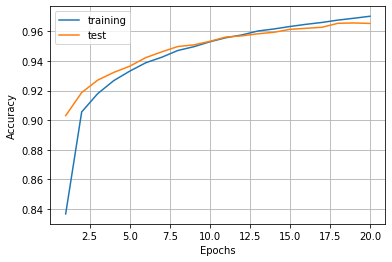

In [15]:
plt.plot(range(1, epochs+1),history.history["acc"], label="training")
plt.plot(range(1, epochs+1),history.history["val_acc"], label="test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plot.show()

plt.plot(range(1, epochs+1), history.history["loss"], label="training")
plt.plot(range(1,epochs+1), history.history["val_loss"], label="test")
plt.xlabel("Epochs")
plt.ylabels("Loss")
plt.grid()
plt.legend()
plt.show()


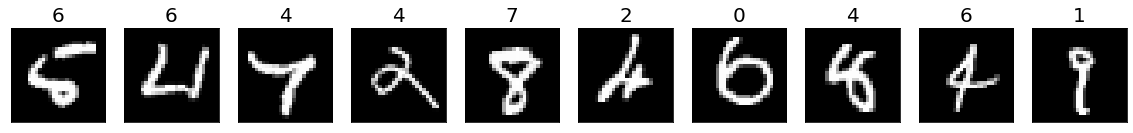

In [21]:
predict_classes = model.predict_classes(x_test)
true__classes = np.argmax(y_test, 1)
error_indexes = predict_classes != true__classes
error_x_test = x_test[error_indexes]
error_predict_classes = predict_classes[error_indexes]

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(error_x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.title(error_predict_classes[i], fontsize=20)
plt.show()